## PENNYLANE VARIATIONAL CLASSIFIER TUTORIAL WALKTHROUGH
## BY: JESSICA OMUNA ANABOR
## For: TEAM QuANSA

**What the below code does**:

*import pennylane as qml*: Imports the PennyLane library and allows you to refer to it using the alias qml.

*from pennylane import numpy as np*: Imports the NumPy module from PennyLane with the alias np, which enables the use of NumPy functions.

*from pennylane.optimize import NesterovMomentumOptimizer*: Imports the Nesterov Momentum Optimizer class from the optimize module of PennyLane, which can be used for optimizing quantum circuits.

In [ ]:
!pip install pennylane
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 53.6 MB/s eta 0:00:00


**What the below code does**:

Creates a quantum device object named *dev* using the *qml.device()* function.

The device is initialized with the configuration '*default.qubit*', indicating that the device is set up to simulate quantum computations on a default qubit simulator.

In [ ]:
dev = qml.device("default.qubit")

**What the below code does**:

A function named *layer* is defined, which takes *layer_weights* as its input. Within the function, it loops through 4 wires and applies a rotational gate *qml.Rot* to each wire using the corresponding set of weights from layer_weights. Following this, it applies Controlled-NOT (*CNOT*) gates between specific pairs of wires as specified in the list of wire pairs.

In order to be unpacked as individual arguments when passing the wires to *qml.CNOT* function, asterisks (*) have been added.

In [ ]:
def layer(layer_weights):
    for wire in range(4):
        qml.Rot(*layer_weights[wire], wires=wire)

    for wires in ([0, 1], [1, 2], [2, 3], [3, 0]):
        qml.CNOT(*wires)

**What the below code does**:

Creates a function named *state_preparation* which accepts an argument *x*. Within this function, the quantum state is prepared utilizing the *qml.BasisState()* function. This function is employed to set up a quantum state defined by the binary form of the integer *x* on the designated *wires* specified in the wires parameter, represented by an array that includes the wire indices [0, 1, 2, 3].

In [ ]:
def state_preparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

**What the below code does**:

 Create a quantum circuit function called *circuit* which takes *weights* and *x* as arguments. Utilize the *state_preparation* function with *x* as input to set up the quantum state. Proceed to loop through the *weights* list, invoking the *layer* function for each *layer_weights*. Ultimately, output the anticipated value of the Pauli-Z operator on qubit 0.

In [ ]:
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)

    for layer_weights in weights:
        layer(layer_weights)

    return qml.expval(qml.PauliZ(0))

**What the below code does**:

Defines a Python function called *variational_classifier* which accepts *weights*, *bias*, and *x* as parameters. The function should compute the circuit function on *weights* and *x*, then add *bias* to the result before returning it.

In [ ]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

**What the below code does**:

1. Prepares the `predictions` array for direct subtraction with the `labels` array using `qml.math.stack(predictions)`.

2. Performs element-wise subtraction between each element of the `labels` array and the corresponding element of the `predictions` array by `labels - qml.math.stack(predictions)`, resulting in an array of errors for each prediction.

3. Squares each error calculated in the previous step with `(labels - qml.math.stack(predictions)) ** 2`.

4. Calculates the mean (average) of all squared errors with `np.mean((labels - qml.math.stack(predictions)) ** 2)`, representing the overall error of the model predictions compared to the true labels.

In [ ]:
def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

**What the below code does**:

The function *accuracy* is defined to compute the accuracy between actual labels and predicted values. The function takes *labels* and *predictions* as input parameters. By using *zip(labels, predictions)*, corresponding elements from labels and predictions are paired into tuples. The sum of 1's is calculated where the absolute difference between *l (label)* and *p (prediction)* is less than 1e-5. This sum is then divided by the length of the labels to obtain the final accuracy value. Finally, the function returns the calculated accuracy value.

In [ ]:
def accuracy(labels, predictions):
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

**What the code below does**:

Defines a function called *cost* with four parameters: *weights*, *bias*, *X*, and *Y*. In the function, make predictions by using a variational classifier on each element *x* in the input list X. Use the predictions to calculate the square loss between the actual values *Y* and the predicted values. Finally, it returns the calculated square loss.

In [ ]:
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls /content/drive/MyDrive/ISS

/content/drive/MyDrive/variational_classifier/data/parity_test.txt


In [ ]:
import numpy as np
data = np.loadtxt("/content/drive/MyDrive/variational_classifier/data/parity_train.txt")

**What the below code does**:

Loads integer data from a text file called '*parity_train.txt*' with the help of NumPy's *loadtxt()* function. Next, we divide the features into array *X* and the labels into array *Y*. The labels are adjusted from {0, 1} to {-1, 1} through scaling. Lastly, loop through each feature x and label y pair using the *zip()* function and display them in a formatted string using an f-string.

In [ ]:
data = np.loadtxt("/content/drive/MyDrive/variational_classifier/data/parity_train.txt", dtype=int)
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])
Y = Y * 2 - 1  # shift label from {0, 1} to {-1, 1}

for x,y in zip(X, Y):
    print(f"x = {x}, y = {y}")

x = [0 0 0 1], y = 1
x = [0 0 1 0], y = 1
x = [0 1 0 0], y = 1
x = [0 1 0 1], y = -1
x = [0 1 1 0], y = -1
x = [0 1 1 1], y = 1
x = [1 0 0 0], y = 1
x = [1 0 0 1], y = -1
x = [1 0 1 1], y = 1
x = [1 1 1 1], y = -1


**What the code below does**:

Imported the NumPy library using the alias *np*.

Set the random seed to 0 for consistent random number generation.

Specified 4 qubits and 2 layers.

Initialized weights with random numbers scaled by 0.01 for each qubit and layer.

Initialized bias with a single value of 0.0.

Displayed the weights and bias.

**Be Aware**: There was a syntax error with *requires_grad=True* which is not a valid argument in this context. This error has been fixed

In [ ]:
import numpy as np

np.random.seed(0)
num_qubits = 4
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3)
bias_init = np.array(0.0)

print('Weights:', weights_init)
print('Bias:', bias_init)

Weights: [[[ 0.01764052  0.00400157  0.00978738]
  [ 0.02240893  0.01867558 -0.00977278]
  [ 0.00950088 -0.00151357 -0.00103219]
  [ 0.00410599  0.00144044  0.01454274]]

 [[ 0.00761038  0.00121675  0.00443863]
  [ 0.00333674  0.01494079 -0.00205158]
  [ 0.00313068 -0.00854096 -0.0255299 ]
  [ 0.00653619  0.00864436 -0.00742165]]]
Bias: 0.0


**What the code below does**:

Develops an optimizer, which is a version of gradient descent commonly utilized in training neural networks for its ability to converge more quickly.

Selects a batch size, which refers to the number of training examples used in a single iteration.

In [ ]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 5

**What the code below does**:

The loop iterates 100 times, updating weights and bias with an optimizer on a limited batch of data. It initializes weights and bias with *weights_init* and *bias_init*. During each iteration, a random batch of indices is selected, input features and target labels are extracted, weights and bias are updated using *opt*, predictions are generated using *variational_classifier*, cost is calculated, accuracy is computed, and iteration number, cost, and accuracy are printed for monitoring.

In [ ]:

import numpy as np

weights = weights_init
bias = bias_init
for it in range(100):

    # Update the weights by one optimizer step, using only a limited batch of data
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    current_cost = cost(weights, bias, X, Y)
    acc = accuracy(Y, predictions)

    print(f"Iter: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.7f}")

/usr/local/lib/python3.10/dist-packages/pennylane/_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Iter:    1 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    2 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    3 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    4 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    5 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    6 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    7 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    8 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:    9 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   10 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   11 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   12 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   13 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   14 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   15 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   16 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   17 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   18 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   19 | Cost: 1.9992626 | Accuracy: 0.5000000
Iter:   20 | Cost: 1.9992626 | 

**What the below code does**:

Loads integer data from the *parity_test.txt* file located in 'variational_classifier/data/' using NumPy's loadtxt function.

Divides the data into X_test (*features*) and Y_test (*labels*).

Transforms the labels in Y_test from {0, 1} to {-1, 1} by multiplying by 2 and then subtracting 1.

Computes predictions for each test feature X_test by utilizing a variational classifier with weights, bias, and each feature as input.

Displays the features x, true labels y, and predicted labels p for each test sample.

Determines the accuracy of the predictions through the accuracy function.

Prints the accuracy on unseen data.

In [ ]:
data = np.loadtxt("/content/drive/MyDrive/variational_classifier/data/parity_test.txt", dtype=int)
X_test = np.array(data[:, :-1])
Y_test = np.array(data[:, -1])
Y_test = Y_test * 2 - 1  # shift label from {0, 1} to {-1, 1}

predictions_test = [np.sign(variational_classifier(weights, bias, x)) for x in X_test]

for x,y,p in zip(X_test, Y_test, predictions_test):
    print(f"x = {x}, y = {y}, pred={p}")

acc_test = accuracy(Y_test, predictions_test)
print("Accuracy on unseen data:", acc_test)

x = [0 0 0 0], y = -1, pred=1.0
x = [0 0 1 1], y = -1, pred=-1.0
x = [1 0 1 0], y = -1, pred=-1.0
x = [1 1 1 0], y = 1, pred=1.0
x = [1 1 0 0], y = -1, pred=1.0
x = [1 1 0 1], y = 1, pred=-1.0
Accuracy on unseen data: 0.5


**What the below code does**:

The function *get_angles* computes three beta angles using the input array *x* and then returns an array containing these angles after performing certain calculations.

The function *state_preparation* utilizes Pennylane to create a quantum state based on the input array *a*. It applies a sequence of quantum gates (*RY, CNOT, PauliX*) on the qubits in order to generate the intended quantum state.

In [ ]:
def get_angles(x):
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def state_preparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

**What the code below does**:

Tests to check if the routine above works, and from the output, it successfully computed the correct angles to prepare the desired state

In [ ]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0])
ang = get_angles(x)


@qml.qnode(dev)
def test(angles):
    state_preparation(angles)

    return qml.state()


state = test(ang)

print("x               : ", np.round(x, 6))
print("angles          : ", np.round(ang, 6))
print("amplitude vector: ", np.round(np.real(state), 6))

x               :  [0.538968 0.795036 0.278265 0.      ]
angles          :  [ 0.563975 -0.        0.       -0.975046  0.975046]
amplitude vector:  [ 0.538968  0.795036  0.278265 -0.      ]


**What the below code does**:

It comprises of two functions: *layer* and *cost*.

The *layer* function iterates over both wires, executing a quantum rotation operation (Rot) on each wire with the respective weights from *layer_weights*. Subsequently, it performs a CNOT gate between wires 0 and 1.
The cost function determines the cost by considering the weights, bias, input data X, and labels Y. It reshapes the input data X to align with the anticipated input format, sends it to a *variational_classifier* function for predictions, and calculates the squared loss between the predictions and the real labels Y.

In [ ]:
def layer(layer_weights):
    for wire in range(2):
        qml.Rot(*layer_weights[wire], wires=wire)
    qml.CNOT(wires=[0, 1])


def cost(weights, bias, X, Y):
    # Transpose the batch of input data in order to make the indexing
    # in state_preparation work
    predictions = variational_classifier(weights, bias, X.T)
    return square_loss(Y, predictions)

**What the code below does**:

Reads information from a text file found at the designated directory.

Retrieves the initial two columns from the information and assigns them to the array *X*.

Extends the vectors in *X* by adding constant values to ensure their size is 4 (2^2) and saves the outcome in *X_pad*.

Normalizes every input vector in *X_pad* by dividing each element by its Euclidean norm.

Computes characteristics as angles for state preparation by applying the function *get_angles* to each normalized vector.

**Be Aware**: Again, there was a syntax error with *requires_grad=False* which has been corrected

In [ ]:
data = np.loadtxt("/content/drive/MyDrive/variational_classifier/data/iris_classes1and2_scaled.txt")
X = data[:, 0:2]
print(f"First X sample (original)  : {X[0]}")

# pad the vectors to size 2^2=4 with constant values
padding = np.ones((len(X), 2)) * 0.1
X_pad = np.c_[X, padding]
print(f"First X sample (padded)    : {X_pad[0]}")

# normalize each input
normalization = np.sqrt(np.sum(X_pad**2, -1))
X_norm = (X_pad.T / normalization).T
print(f"First X sample (normalized): {X_norm[0]}")

# the angles for state preparation are the features
features = np.array([get_angles(x) for x in X_norm])
print(f"First features sample      : {features[0]}")

Y = data[:, -1]

First X sample (original)  : [0.4  0.75]
First X sample (padded)    : [0.4  0.75 0.1  0.1 ]
First X sample (normalized): [0.46420708 0.87038828 0.11605177 0.11605177]
First features sample      : [ 0.32973573 -0.78539816  0.78539816 -1.080839    1.080839  ]


**What the below code does**:

Using the Matplotlib library, scatter plots are generated for various data point sets.

Three distinct figures are produced through `plt.figure()` to visualize different data sets.

For every figure, `plt.scatter()` is employed to create scatter plots based on the conditions `Y == 1` and `Y == -1`, with varying dim1 and dim2 values.

The color of the points is specified by `c="b` (blue) or `c="r"` (red).

Markers are configured as circles (`marker="o"`) with a black edge color (`ec="k"`).

`plt.title()` function is utilized to assign titles to each plot, containing relevant information about the data being represented.

Finally, `plt.show()` is invoked to exhibit each plot individually.

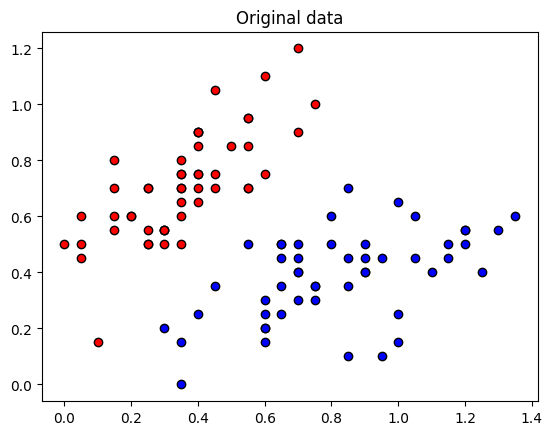

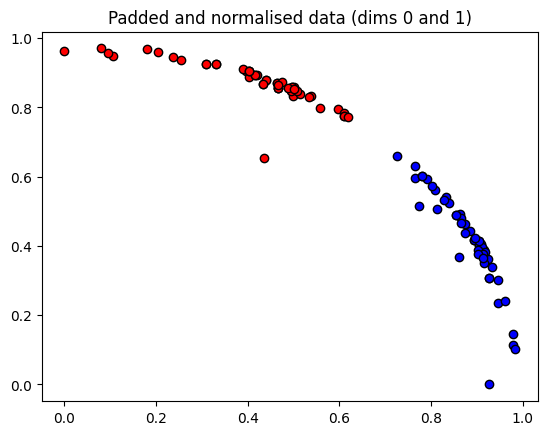

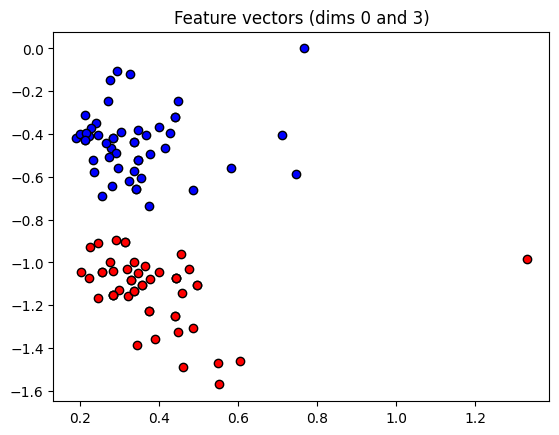

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="r", marker="o", ec="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Padded and normalised data (dims {dim1} and {dim2})")
plt.show()

plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Feature vectors (dims {dim1} and {dim2})")
plt.show()


**What the code below does**:

Sets a random seed to 0 with `np.random.seed(0)`. Save the length of variable `Y` as `num_data`. Calculate 75% of `num_data` as the number of training data points and store it in `num_train`.

Then, generate an array of random permutations of `range(num_data)` and save it in index. Use indexed slicing to select subsets of the features and Y arrays, splitting the data into training and validation sets - `feats_train`, `Y_train`, `feats_val`, and `Y_val`.

Finally, extract segments of the `X` array using the same indexing logic to create `X_train` and `X_val`, which will be utilized for plotting.



In [ ]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

**What the code below does**:

Sets a random seed to 0 with `np.random.seed(0)`. Save the length of variable `Y` as `num_data`. Calculate 75% of `num_data` as the number of training data points and store it in `num_train`.

Then, generates an array of random permutations of `range(num_data)` and save it in index. Use indexed slicing to select subsets of the features and `Y` arrays, splitting the data into training and validation sets - `feats_train`, `Y_train`, `feats_val`, and `Y_val`.

Finally, extracts segments of the `X` array using the same indexing logic to create `X_train` and `X_val`, which will be utilized for plotting.

In [ ]:
num_qubits = 2
num_layers = 6

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3)
bias_init = np.array(0.0)

**What the below code does**:

A variational classifier is being trained using the Nesterov Momentum optimizer.

The code imports the necessary libraries and initializes the Nesterov Momentum optimizer with a learning rate of 0.01.

A batch size of 5 is defined for training.

The weights and biases are initialized.

A loop runs for 60 iterations to train the classifier.

Within each iteration, a random batch of training data is selected.

The optimizer takes a step to update the weights and biases based on the selected batch using the Nesterov Momentum optimizer.

Predictions are computed for both the training and validation sets using the variational classifier.

Accuracy is calculated for both the training and validation predictions.

If the iteration is divisible by 2, the cost function is computed and the current iteration details along with cost and accuracies are printed

In [ ]:
opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init
for it in range(60):
    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)

    # Compute predictions on train and validation set
    predictions_train = np.sign(variational_classifier(weights, bias, feats_train.T))
    predictions_val = np.sign(variational_classifier(weights, bias, feats_val.T))

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if (it + 1) % 2 == 0:
        _cost = cost(weights, bias, features, Y)
        print(
            f"Iter: {it + 1:5d} | Cost: {_cost:0.7f} | "
            f"Acc train: {acc_train:0.7f} | Acc validation: {acc_val:0.7f}"
        )

Iter:     2 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:     4 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:     6 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:     8 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    10 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    12 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    14 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    16 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    18 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    20 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    22 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    24 | Cost: 1.8577915 | Acc train: 0.4800000 | Acc validation: 0.5600000
Iter:    26 | Cost: 1.857791

**What the code below does**:

A plot is created using *plt.figure()* with decision regions and data points.

The code generates a meshgrid for decision regions and preprocesses the grid points.

It then calculates predictions for the grid points based on the variational classifier.

The decision regions are plotted with contours and colors based on the predictions.

Data points from training and validation sets are scattered on the plot with different markers and colors.

A legend is added to differentiate between different classes of data points.

Ultimately, the plot is displayed using *plt.show()*.

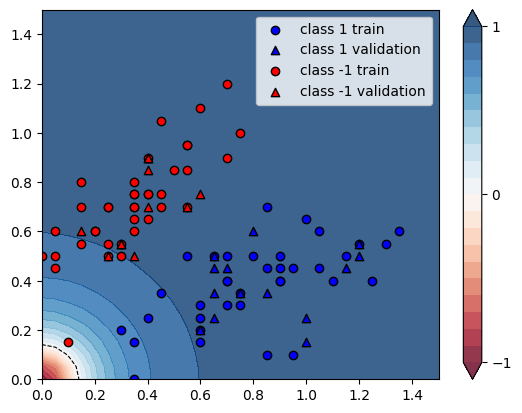

In [ ]:
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 30), np.linspace(0.0, 1.5, 30))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

# preprocess grid points like data inputs above
padding = 0.1 * np.ones((len(X_grid), 2))
X_grid = np.c_[X_grid, padding]  # pad each input
normalization = np.sqrt(np.sum(X_grid**2, -1))
X_grid = (X_grid.T / normalization).T  # normalize each input
features_grid = np.array([get_angles(x) for x in X_grid])  # angles are new features
predictions_grid = variational_classifier(weights, bias, features_grid.T)
Z = np.reshape(predictions_grid, xx.shape)

# plot decision regions
levels = np.arange(-1, 1.1, 0.1)
cnt = plt.contourf(xx, yy, Z, levels=levels, cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])

# plot data
for color, label in zip(["b", "r"], [1, -1]):
    plot_x = X_train[:, 0][Y_train == label]
    plot_y = X_train[:, 1][Y_train == label]
    plt.scatter(plot_x, plot_y, c=color, marker="o", ec="k", label=f"class {label} train")
    plot_x = (X_val[:, 0][Y_val == label],)
    plot_y = (X_val[:, 1][Y_val == label],)
    plt.scatter(plot_x, plot_y, c=color, marker="^", ec="k", label=f"class {label} validation")

plt.legend()
plt.show()